In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('iris.csv')

In [32]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
df.columns =['sepal_length', 'sepal_width','petal_length','petal_width','flower_class']
df.loc[len(df.index)]=[5.1,3.5,1.4,0.2,'Iris-setosa'] #Since 1st row was replaced by column names.
new_df = pd.DataFrame(df)
new_df['flower_class'] = df.flower_class.astype('category')
new_df['flower_class']= new_df['flower_class'].cat.codes

In [34]:
new_df

,sepal_length,sepal_width,petal_length,petal_width,flower_class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2
148,5.9,3.0,5.1,1.8,2


In [35]:
features = new_df.drop(columns=['flower_class']).values
target = new_df['flower_class'].values

In [36]:
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0]


In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(features,target, test_size=.2, )

array([0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 1, 2], dtype=int8)

In [38]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [39]:
pred = gnb.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score

acc  = accuracy_score(pred,y_test)
print(f"Accuracy : {acc*100}")

Accuracy : 96.66666666666667


In [41]:
from sklearn.metrics import precision_score, confusion_matrix,recall_score,f1_score

cm = confusion_matrix(y_test, pred)
precision = precision_score(y_test, pred,average='macro')
recall = recall_score(y_test, pred,average='macro')
f1 = f1_score(y_test,pred,average='macro')

In [42]:
print(cm)
print(precision)
print(recall)
print(f1)

[[ 7  0  0]
 [ 0 11  0]
 [ 0  1 11]]
0.9722222222222222
0.9722222222222222
0.9710144927536232


In [43]:
from sklearn.metrics import roc_curve

In [44]:
proba = gnb.predict_proba(x_test)

In [45]:
setosa, virginica, versicolor = new_df.groupby('flower_class')


In [46]:
ytrue_arr= np.array(y_test).reshape(-1,1)
prob_arr= np.array(proba).reshape(-1,1)

In [47]:
df

,sepal_length,sepal_width,petal_length,petal_width,flower_class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [48]:
X,y  = np.array( df.drop(columns=['flower_class'])), np.array(df['flower_class'])

In [49]:
Xtrain,Xtest, Ytrain,Ytest = train_test_split(X,y, test_size=0.2)

In [50]:
classifier = GaussianNB()
y_score = classifier.fit(Xtrain,Ytrain).predict_proba(Xtest)

In [51]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer().fit(Ytrain)
y_onehot_test = lb.transform(Ytest)


In [52]:
y_onehot_test.shape

(30, 3)

In [53]:
lb.transform(["Iris-versicolor"])

array([[0, 1, 0]])

In [54]:
class_of_interest = "Iris-virginica"
class_id = np.flatnonzero(lb.classes_ == class_of_interest)[0]
class_id

2

In [57]:
y_score

array([[1.00000000e+000, 1.15054094e-017, 9.76639156e-024],
       [1.00000000e+000, 8.25171770e-017, 3.32434591e-024],
       [4.15165185e-192, 3.61523486e-005, 9.99963848e-001],
       [1.26809306e-199, 3.71644727e-006, 9.99996284e-001],
       [1.00000000e+000, 7.67720292e-017, 3.55421064e-024],
       [3.54658762e-085, 9.95412921e-001, 4.58707902e-003],
       [1.00000000e+000, 9.70138064e-016, 2.85334151e-023],
       [1.85801023e-062, 9.99949143e-001, 5.08571194e-005],
       [1.00000000e+000, 1.14590575e-017, 8.00232731e-025],
       [1.41816315e-147, 4.38445574e-002, 9.56155443e-001],
       [1.00000000e+000, 3.89632522e-017, 5.09904450e-024],
       [1.61876619e-093, 9.85160040e-001, 1.48399603e-002],
       [6.71437749e-070, 9.99942748e-001, 5.72515882e-005],
       [9.24931985e-163, 8.66572507e-004, 9.99133427e-001],
       [1.22069213e-048, 9.99996700e-001, 3.29955652e-006],
       [1.00000000e+000, 2.84357742e-015, 4.23447650e-021],
       [6.26459792e-068, 9.99853936e-001

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from yellowbrick.classifier import PrecisionRecallCurve


In [60]:
X = OrdinalEncoder().fit_transform(new_df.drop(columns=['flower_class']))
encoder  = LabelEncoder()
Y = encoder.fit_transform(target)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

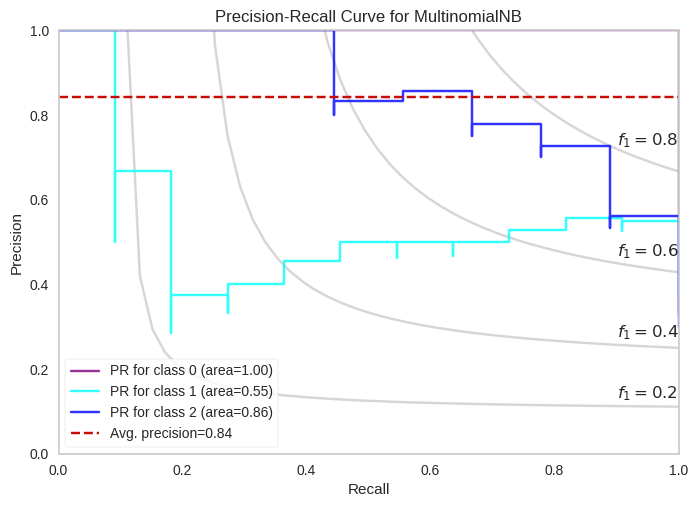

<AxesSubplot:title={'center':'Precision-Recall Curve for MultinomialNB'}, xlabel='Recall', ylabel='Precision'>

In [62]:
viz = PrecisionRecallCurve(
    MultinomialNB(), 
    classes = encoder.classes_,
    colors=["purple", "cyan", "blue"],
    iso_f1_curves=True,
    per_class=True,
    micro=False
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
